# QUERIES WITH ATHENA

In [1]:
%pip install -qU 'sagemaker>=2.15.0' 'PyAthena==2.1.0' 'awswrangler==1.2.0'


Note: you may need to restart the kernel to use updated packages.


In [2]:
#INGESTING CRITICS DATA FILE INTO CRITICS
import boto3
import pandas as pd
s3_client = boto3.client("s3")
BUCKET='ecinemas'
KEY='cx/cx.csv'
response = s3_client.get_object(Bucket=BUCKET, Key=KEY)
cx = pd.read_csv(response.get("Body"))
cx.head()

,ID_Movie,Expert,Score,Sentiment,Review
0,7369,RogerEbert.com,88,3,Call Me Lucky will be an especially grueling r...
1,7369,New York Daily News,80,1,"Angry, quixotic, tragic, heroic — Crimmins’ li..."
2,7369,Village Voice,80,7,Call Me Lucky is a loving but fair portrait of...
3,7369,TheWrap,75,2,There should be more Crimmins performance foot...
4,7369,Movie Nation,75,3,Call Me Lucky is another of those “the funnies...


In [3]:
#INGESTING USERS DATA FILE INTO USER

BUCKET='ecinemas'
KEY='user/user.csv'
response = s3_client.get_object(Bucket=BUCKET, Key=KEY)
user = pd.read_csv(response.get("Body"))
user.head()

,ID_Movie,Score,Sentiment,User,Review
0,1,7,12,DemiRonin,$9.99 is a series of unique short stories. How...
1,1,4,2,steven,I don't mean to be a Debbie Downer and I am al...
2,3,9,0,RayJ.,Superb.
3,3,9,0,MichaelV.,Lillo is so hot!
4,3,6,-4,GilbertMulroneycakesAndFriends,What the hell is that title all about? I assum...


In [4]:
#INGESTING SALE DATA TABLE INTO SALE

s3_client = boto3.client("s3")
BUCKET= 'ecinemas'
KEY='sale/sale.csv'
response = s3_client.get_object(Bucket=BUCKET, Key=KEY)
sale = pd.read_csv(response.get("Body"))
sale.head()

,MovieName,Rank_data,PreviousWeekRank,GrossW,Theaters
0,Stuart Little,1,1,13012299,2979
1,The Green Mile,2,3,12521303,2678
2,The Talented Mr. Ripley,3,2,11780319,2316
3,Any Given Sunday,4,4,10971011,2505
4,Galaxy Quest,5,6,9784389,2450


In [5]:
#INGESTING PRODUCT DATA TABLE IN PRODUCT

BUCKET='ecinemas'
KEY='product/product.csv'
response = s3_client.get_object(Bucket=BUCKET, Key=KEY)
product = pd.read_csv(response.get("Body"))
product.head()

,ID,Title,Publisher,Metascore,Meta_Pos_Count,Meta_Neut_Count,Meta_Neg_Count,User_Score,User_Pos_Count,User_Neut_Count,User_Neg_Count,Runtime,Genre,Rating
0,1,9.99,Regent Releasing,68.0,12.0,3.0,0.0,7.1,1,1.0,0,78 min,Drama;Animation,Rated R for language and brief sexuality and n...
1,2,$pent,Regent Releasing,34.0,1.0,3.0,4.0,0.0,0,0.0,0,91 min,Genre: ...,NaN
2,3,'R Xmas,Pathfinder Pictures,55.0,4.0,5.0,2.0,7.1,4,0.0,0,85 min,Drama;Crime,"Rated R for strong language, drug content and ..."
3,4,(500) Days of Summer,Fox Searchlight Pictures,76.0,33.0,3.0,0.0,7.9,161,7.0,24,95 min,Drama;Comedy;Romance,Rated PG-13 for sexual material and language.
4,5,1,IFC Midnight,60.0,3.0,2.0,1.0,8.0,0,0.0,0,NaN,NULL,NaN


#AFTER LOOKING AT THE DATA TABLE MANUALLY, IT'S NOTED THAT PRODUCT AND SALE DATA TABLES ARE TWO MOST USEFUL DATASETS FOR OUR PROJECT.

#TWO TABLES ARE COMBINED, DROPPED THE UNNECESSARY COLUMNS, FORMAT THE RUN-TIME(STRNG) INTO NUMERICAL COLUMN AS RUNTIME AND RATING COLUMNS ARE CATEGORIZED ACCORDINGLY AND SAVED INTO THE DATA TABLE NAMED 'etiocinemas'

#THE MERGED TABLE 'ETIOINEMAS' WILL BE MAINLY USED FOR DATA QUERIES FOR ATHENA. 

In [6]:
#INGESTING ETIOCINEMAS DATA TABLE 

BUCKET='ecinemas'
KEY='etiocinemas/etiocinemas.csv'
response = s3_client.get_object(Bucket=BUCKET, Key=KEY)
etiocinemas = pd.read_csv(response.get("Body"))
etiocinemas.head()

,Unnamed: 0,Int,Rank_data,PreviousWeekRank,Metascore,Meta_Pos_Count,Meta_Neut_Count,Meta_Neg_Count,User_Score,User_Pos_Count,User_Neut_Count,User_Neg_Count,MovieName,GrossW,Runtime_Value,Rated,Publisher,Director,Genre
0,0,0,1,1,61,22,7,3,6.8,0,0,0,Stuart Little,13012299,84,PG,American Broadcasting Company (ABC),Rob Minkoff,Adventure;Fantasy;Comedy;Family
1,1,1,2,1,61,22,7,3,6.8,0,0,0,Stuart Little,13560203,84,PG,American Broadcasting Company (ABC),Rob Minkoff,Adventure;Fantasy;Comedy;Family
2,2,2,4,2,61,22,7,3,6.8,0,0,0,Stuart Little,7554094,84,PG,American Broadcasting Company (ABC),Rob Minkoff,Adventure;Fantasy;Comedy;Family
3,3,3,4,4,61,22,7,3,6.8,0,0,0,Stuart Little,5690856,84,PG,American Broadcasting Company (ABC),Rob Minkoff,Adventure;Fantasy;Comedy;Family
4,4,4,3,4,61,22,7,3,6.8,0,0,0,Stuart Little,5394977,84,PG,American Broadcasting Company (ABC),Rob Minkoff,Adventure;Fantasy;Comedy;Family


In [7]:
#Locating the S3 bucket
!aws s3 ls s3://ecinemas/etiocinemas/

2022-04-02 19:34:52          0 
2022-04-03 09:22:06    7577491 etiocinemas.csv


In [8]:
import boto3
import sagemaker
import pandas as pd
sess = sagemaker.Session()
bucket = sess.default_bucket()
role = sagemaker.get_execution_role()
region = boto3.Session().region_name
account_id = boto3.client("sts").get_caller_identity().get("Account") 
sm = boto3.Session().client(service_name="sagemaker", region_name=region)



In [9]:
from pyathena import connect


In [10]:
#SET S3 SOURCE LOCATION (PUBLIC S3 BUCKET)
s3_public_path_csv = "s3://ecinemas"
%store s3_public_path_csv

Stored 's3_public_path_csv' (str)


In [11]:
#SET S3 DESTINATION LOCATION (PRIVATE S3 BUCKET)
s3_private_path_csv = "s3://{}/ecinemas".format(bucket)
print(s3_private_path_csv)

s3://sagemaker-us-east-1-364962763824/ecinemas


In [12]:
#COPY DATA FROM PUBLIC BUCKET S3 TO OUR PRIVATE S3 BUCKET

!aws s3 cp --recursive $s3_public_path_csv/ $s3_private_path_csv/ --exclude "*" --include "etiocinemas/etiocinemas.csv"

copy: s3://ecinemas/etiocinemas/etiocinemas.csv to s3://sagemaker-us-east-1-364962763824/ecinemas/etiocinemas/etiocinemas.csv


In [13]:
print(s3_private_path_csv)

s3://sagemaker-us-east-1-364962763824/ecinemas


In [14]:

!aws s3 ls $s3_private_path_csv/etiocinemas/

2022-04-10 03:27:26    7577491 etiocinemas.csv


In [15]:
# Set S3 staging directory -- this is a temporary directory used for Athena queries

s3_private_path_etiocinemas = "s3://{}/ecinemas/etiocinemas/".format(bucket)
print(s3_private_path_etiocinemas)

s3://sagemaker-us-east-1-364962763824/ecinemas/etiocinemas/


In [16]:
s3_staging_dir = "s3://{0}/athena/staging".format(bucket)
conn = connect(region_name=region, s3_staging_dir=s3_staging_dir)


In [17]:
database_name = "eoo"
statement = "CREATE DATABASE IF NOT EXISTS {}".format(database_name) 
print(statement)
pd.read_sql(statement, conn)
statement = "SHOW DATABASES"
df_show = pd.read_sql(statement, conn)
df_show.head(20)

CREATE DATABASE IF NOT EXISTS eoo


,database_name
0,default
1,ecinemas
2,eoo
3,sagemaker_featurestore


In [18]:
#SETTING UP ATHENA PARAMETERS

etiocinemas = "etiocinemas"

In [19]:
#SQL STATEMENT FOR ETIOCINEMAS TABLE

statement_etiocinemas = """CREATE EXTERNAL TABLE IF NOT EXISTS {}.{}(
         Unnamed            int,
         Int                int,
         Rank_data          int,
         PreviousWeekRank   int,
         Metascore          int,
         Meta_Pos_Count     int,
         Meta_Neut_Count    int,
         Meta_Neg_Count     int,
         User_Score         int,
         User_Pos_Count     int,
         User_Neut_Count    int,
         User_Neg_Count     int,
         MovieName          string,
         GrossW             bigint,
         Runtime_Value      int,
         Rated              string,
         Publisher          string,
         Director           string, 
         Genre              string

)
ROW FORMAT DELIMITED FIELDS TERMINATED BY ',' LINES TERMINATED BY '\n'
LOCATION '{}'
TBLPROPERTIES ('skip.header.line.count'='1')""".format(database_name, etiocinemas, s3_private_path_etiocinemas)

pd.read_sql(statement_etiocinemas, conn)




""


In [20]:
#CHECKING IF THE TABLE WAS CREATED PROPERLY

statement = """SELECT * FROM {}.{} limit 10""".format( database_name, etiocinemas)
print(statement)
df = pd.read_sql(statement, conn)
df.head(20)

SELECT * FROM eoo.etiocinemas limit 10


,unnamed,int,rank_data,previousweekrank,metascore,meta_pos_count,meta_neut_count,meta_neg_count,user_score,user_pos_count,user_neut_count,user_neg_count,moviename,grossw,runtime_value,rated,publisher,director,genre
0,0,0,1,1,61,22,7,3,6,0,0,0,Stuart Little,13012299,84,PG,American Broadcasting Company (ABC),Rob Minkoff,Adventure;Fantasy;Comedy;Family
1,1,1,2,1,61,22,7,3,6,0,0,0,Stuart Little,13560203,84,PG,American Broadcasting Company (ABC),Rob Minkoff,Adventure;Fantasy;Comedy;Family
2,2,2,4,2,61,22,7,3,6,0,0,0,Stuart Little,7554094,84,PG,American Broadcasting Company (ABC),Rob Minkoff,Adventure;Fantasy;Comedy;Family
3,3,3,4,4,61,22,7,3,6,0,0,0,Stuart Little,5690856,84,PG,American Broadcasting Company (ABC),Rob Minkoff,Adventure;Fantasy;Comedy;Family
4,4,4,3,4,61,22,7,3,6,0,0,0,Stuart Little,5394977,84,PG,American Broadcasting Company (ABC),Rob Minkoff,Adventure;Fantasy;Comedy;Family
5,5,5,8,3,61,22,7,3,6,0,0,0,Stuart Little,3264727,84,PG,American Broadcasting Company (ABC),Rob Minkoff,Adventure;Fantasy;Comedy;Family
6,6,6,14,8,61,22,7,3,6,0,0,0,Stuart Little,2592029,84,PG,American Broadcasting Company (ABC),Rob Minkoff,Adventure;Fantasy;Comedy;Family
7,7,7,18,14,61,22,7,3,6,0,0,0,Stuart Little,1254921,84,PG,American Broadcasting Company (ABC),Rob Minkoff,Adventure;Fantasy;Comedy;Family
8,8,8,24,18,61,22,7,3,6,0,0,0,Stuart Little,520394,84,PG,American Broadcasting Company (ABC),Rob Minkoff,Adventure;Fantasy;Comedy;Family
9,9,9,24,24,61,22,7,3,6,0,0,0,Stuart Little,817229,84,PG,American Broadcasting Company (ABC),Rob Minkoff,Adventure;Fantasy;Comedy;Family


In [21]:
#CHECKING TOP TEN MOVIENAME WITH HIGHEST METASCORE

statement = """SELECT MovieName, max(metascore) as Max_Metascore FROM {}.{}
    group by MovieName
    order by Max_Metascore desc
   """.format(
    database_name, etiocinemas
)
print(statement)
df = pd.read_sql(statement, conn)
df.head(10)

SELECT MovieName, max(metascore) as Max_Metascore FROM eoo.etiocinemas
    group by MovieName
    order by Max_Metascore desc
   


,MovieName,Max_Metascore
0,Boyhood,100
1,Moonlight,99
2,Manchester by the Sea,96
3,Parasite,96
4,Portrait of a Lady on Fire,95
5,The Social Network,95
6,A Separation,95
7,Before Midnight,94
8,Faces Places,94
9,The Hurt Locker,94


In [30]:
#CHECKING TOP 10 HIGHEST EARNED MOVIES WITH HIGHEST METASCORE AND HIGHEST USERSCORE

statement = """SELECT MovieName, GrossW, max(MetaScore) as Max_Avg_Score, max(User_Score) as Max_UserScore FROM {}.{}
    group by MovieName,GrossW
    order by GrossW desc
    limit 10
   """.format(
    database_name, etiocinemas
)
print(statement)
df = pd.read_sql(statement, conn)
df.head(10)


SELECT MovieName, GrossW, max(MetaScore) as Max_Avg_Score, max(User_Score) as Max_UserScore FROM eoo.etiocinemas
    group by MovieName,GrossW
    order by GrossW desc
    limit 10
   


,MovieName,GrossW,Max_Avg_Score,Max_UserScore
0,Avengers: Endgame,473894638,78,7
1,Star Wars: Episode VII - The Force Awakens,390856054,80,6
2,Avengers: Infinity War,338332540,68,8
3,Star Wars: Episode VIII - The Last Jedi,296602356,84,4
4,Jurassic World,296211625,59,6
5,Black Panther,291954422,88,6
6,Star Wars: Episode IX - The Rise of Skywalker,289796816,53,4
7,The Lion King,275251534,55,6
8,The Avengers,270019373,69,7
9,Incredibles 2,269446690,80,7


In [51]:
##CHECKING TOP 10 MOVIES THAT RANKED TOP 20 PERCENTILE BY METASCORE AND USERSCORE

statement = """SELECT MovieName, Metascore, User_Score, Rated FROM {}. {}
    where Metascore > 80 and User_Score > 7.2
    group by MovieName, Rated, Metascore, User_Score
    order by Metascore desc
    limit 10
   """.format(
    database_name, etiocinemas
)
print(statement)
top20rank = pd.read_sql(statement, conn)
top20rank.head(10)

SELECT MovieName, Metascore, User_Score, Rated FROM eoo. etiocinemas
    where Metascore > 80 and User_Score > 7.2
    group by MovieName, Rated, Metascore, User_Score
    order by Metascore desc
    limit 10
   


,MovieName,Metascore,User_Score,Rated
0,Parasite,96,8,NR
1,Manchester by the Sea,96,8,R
2,Portrait of a Lady on Fire,95,8,R
3,A Separation,95,8,PG-13
4,The Social Network,95,8,PG-13
5,The Lord of the Rings: The Return of the King,94,9,PG-13
6,Spirited Away,94,9,PG
7,Dunkirk,94,8,PG-13
8,Carol,94,8,R
9,La La Land,94,8,PG-13


In [54]:
# MOVIES WITH THE HIGHEST GROSS SALES

statement = """SELECT MovieName, GrossW FROM {}.{}
    group by MovieName, GrossW
    order by GrossW desc
    limit 10
   """.format(
    database_name, etiocinemas
)
print(statement)
gross_sales = pd.read_sql(statement, conn)
gross_sales.head(10)


SELECT MovieName, GrossW FROM eoo.etiocinemas
    group by MovieName, GrossW
    order by GrossW desc
    limit 10
   


,MovieName,GrossW
0,Avengers: Endgame,473894638
1,Star Wars: Episode VII - The Force Awakens,390856054
2,Avengers: Infinity War,338332540
3,Star Wars: Episode VIII - The Last Jedi,296602356
4,Jurassic World,296211625
5,Black Panther,291954422
6,Star Wars: Episode IX - The Rise of Skywalker,289796816
7,The Lion King,275251534
8,The Avengers,270019373
9,Incredibles 2,269446690


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Avengers: Endgame'),
  Text(1, 0, 'Star Wars: Episode VII - The Force Awakens'),
  Text(2, 0, 'Avengers: Infinity War'),
  Text(3, 0, 'Star Wars: Episode VIII - The Last Jedi'),
  Text(4, 0, 'Jurassic World'),
  Text(5, 0, 'Black Panther'),
  Text(6, 0, 'Star Wars: Episode IX - The Rise of Skywalker'),
  Text(7, 0, 'The Lion King'),
  Text(8, 0, 'The Avengers'),
  Text(9, 0, 'Incredibles 2')])

<Figure size 10800x7200 with 0 Axes>

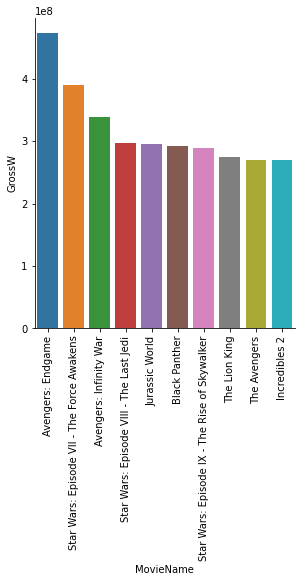

In [61]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(150,100))
ax = sns.catplot(data=gross_sales, x="MovieName", y="GrossW", kind = "bar")
plt.xticks(rotation=90)